# Male Female Face detection based on CNN

## problem statement

The objective is to recognize the face is of the male person or the female person based on CNN .

### Importing Modules

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [23]:
import os 
import cv2 


### Importing data

In [24]:
path= "G:\cnn\Male and Female face dataset"
category = ["Female Faces","Male Faces"]

In [25]:
for i in category:
    print(i)

Female Faces
Male Faces


### Show the image

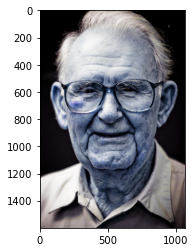

In [26]:
for i in category:
    folders = os.path.join(path, i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path)    
        plt.imshow(image_array) 
        break 

In [27]:
image_size =300

### Categorized by labels

In [28]:
input_image = []    
for i in category:
    folders = os.path.join(path ,i)
    label   = category.index(i)   
    print("Value of label is "  , label)
    for image in os.listdir(folders):
        image_path  = os.path.join(folders , image)
        image_array =  cv2.imread(image_path) 
        image_array =cv2.resize(image_array , (image_size  , image_size) ) 
        input_image.append([image_array , label])

Value of label is  0
Value of label is  1


In [29]:
input_image

[[array([[[138, 109,  88],
          [137, 109,  85],
          [136, 107,  86],
          ...,
          [  7,   7,   9],
          [ 11,   9,   9],
          [ 15,  10,  11]],
  
         [[137, 108,  87],
          [137, 108,  87],
          [135, 106,  85],
          ...,
          [  2,   2,   2],
          [  7,   6,   8],
          [ 13,  10,  12]],
  
         [[137, 108,  87],
          [138, 109,  88],
          [135, 106,  85],
          ...,
          [  5,   3,   3],
          [  3,   3,   3],
          [  9,   6,   8]],
  
         ...,
  
         [[ 18,  15,  18],
          [ 16,  15,  19],
          [ 15,  14,  18],
          ...,
          [ 10,   5,   6],
          [  9,   7,   7],
          [  6,   4,   5]],
  
         [[ 23,  20,  22],
          [ 22,  19,  21],
          [ 19,  18,  20],
          ...,
          [  5,   3,   3],
          [  5,   3,   2],
          [ 11,   8,  10]],
  
         [[ 29,  24,  26],
          [ 25,  24,  24],
          [ 24,  19,  21

In [30]:
len(input_image)

5418

we have 5418 input images .

In [31]:
np.random.shuffle(input_image)

In [32]:
x = []
y = []
for x_values, labels in input_image:
    x.append(x_values)
    y.append(labels)

In [33]:
x = np.array(x)
y = np.array(y)

In [34]:
x.shape

(5418, 300, 300, 3)

In [35]:
y

array([0, 0, 1, ..., 0, 0, 0])

### Sample image

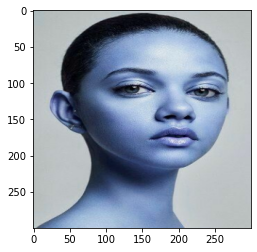

In [36]:
plt.imshow(x[4])

### Sampling 

In [37]:
from sklearn.model_selection import train_test_split
x_train , x_test1 , y_train , y_test = train_test_split(x , y, test_size =.2)

In [38]:
x_train =x_train/255
x_test =x_test1/255

In [39]:
x_train.shape

(4334, 300, 300, 3)

In [40]:
x_test.shape

(1084, 300, 300, 3)

In [41]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout

In [42]:
from tensorflow.keras.utils import to_categorical 

### Neural network 

In [43]:
model = Sequential()

model.add(Conv2D(filters = 14 , kernel_size = (7,7) , activation ='relu' , padding='same'))
model.add(MaxPool2D(pool_size=(2 , 2)))
model.add(Flatten())

model.add(Dense(128 , activation='relu'))
model.add(Dense(2 , activation='softmax'))

In [44]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy' , metrics=['accuracy']) 

In [45]:
model1 = model.fit(x_train , y_train ,epochs = 6 , validation_split = .2 , batch_size = 64)

Epoch 1/6
55/55 [==============================] - 364s 7s/step - loss: 2.2598 - accuracy: 0.6227 - val_loss: 0.3372 - val_accuracy: 0.8454
Epoch 2/6
55/55 [==============================] - 286s 5s/step - loss: 0.2165 - accuracy: 0.9239 - val_loss: 0.1156 - val_accuracy: 0.9573
Epoch 3/6
55/55 [==============================] - 283s 5s/step - loss: 0.0321 - accuracy: 0.9925 - val_loss: 0.0559 - val_accuracy: 0.9792
Epoch 4/6
55/55 [==============================] - 290s 5s/step - loss: 0.0047 - accuracy: 0.9997 - val_loss: 0.0621 - val_accuracy: 0.9827
Epoch 5/6
55/55 [==============================] - 283s 5s/step - loss: 8.3429e-04 - accuracy: 1.0000 - val_loss: 0.0775 - val_accuracy: 0.9792
Epoch 6/6
55/55 [==============================] - 284s 5s/step - loss: 3.9583e-04 - accuracy: 1.0000 - val_loss: 0.0781 - val_accuracy: 0.9804


### Save a model 

In [46]:
model.save('cnn_on_male_and_female_data.h5')

### Predictions

In [47]:
pred_values = model.predict(x_test)

34/34 [==============================] - 24s 675ms/step


In [60]:
pred_classes = np.argmax(pred_values, axis =1)
pred_classes


array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

### Confusion metrics

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_test,pred_classes)

array([[530,   7],
       [  9, 538]], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test, pred_classes)

0.985239852398524

### observations
we have got 87.52% test accuracy.